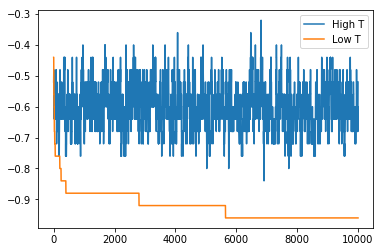

In [14]:
# The purpose of this assignment is to develop data handling skills around statistical information.
# The two files are PE/N data from 1D MC simulations with N=25, V=50, at T=1.0 or T=0.1.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
def autocorr1D(array):
    '''Takes in a linear numpy array, performs autocorrelation
       function and returns normalized array with half the length 
       of the input'''
    ft = numpy.fft.rfft(array-numpy.average(array)) 
    acorr = numpy.fft.irfft(ft*numpy.conjugate(ft))/(len(array)*numpy.var(array))
    return acorr[0:len(acorr)//2]
u1 = numpy.loadtxt('1.0.txt')
u2 = numpy.loadtxt('0.1.txt')
fig, ax = plt.subplots()
ax.plot(u1,label="High T")
ax.plot(u2,label="Low T")
legend = ax.legend(loc="upper right")

autoHT = autocorr1D(np.loadtxt('1.0.txt'))
autoLT = autocorr1D(np.loadtxt('0.1.txt'))

In [15]:
#1. What are the means and standard deviations of these two datasets?
import numpy as np

meanhT = np.mean(np.loadtxt('1.0.txt'))
meanlT = np.mean(np.loadtxt('0.1.txt'))
stdhT = np.std(np.loadtxt('1.0.txt'))
stdlT = np.std(np.loadtxt('0.1.txt'))
f'Means of 1.0.txt and 0.1.txt respectively are {meanhT:.4f}, {meanlT:.4f} and standard deviations are {stdhT:.4f}, {stdlT:.4f}'

'Means of 1.0.txt and 0.1.txt respectively are -0.6023, -0.9223 and standard deviations are 0.0684, 0.0452'

'Statistically independent samples for the higher temperature are 111.1 and statistically independent samples for the higher temperature are 2.0'

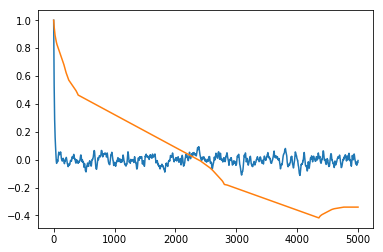

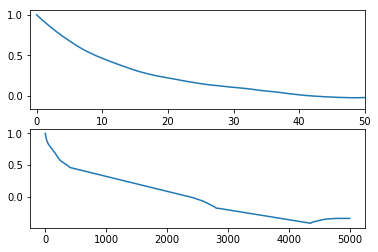

In [16]:
#2. How many statistically independent samples can we extract from each of these data sets?
import numpy as np
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(autoHT)
plt.plot(autoLT)

plt.figure(2)
plt.subplot(211)
plt.plot(autoHT)
plt.xlim(-1,50)

plt.subplot(212)
plt.plot(autoLT)


# Number of independent samples is equal to the number of samples, len(autocorr)/decorrelation time(number of steps)
ind_HT = len(autoHT)/45
ind_LT = len(autoLT)/2500

f'Statistically independent samples for the higher temperature are {ind_HT:.1f} and statistically independent samples for the higher temperature are {ind_LT:.1f}'


In [51]:
#4. What are the means and standard deviations of the statistically independent subsets of these data sets?
import numpy as np
A = np.loadtxt('1.0.txt')
num_HT=[]
num_LT=[]

for i, energy in enumerate(np.loadtxt('1.0.txt')):
    if i%45 == 0:
        num_HT.append(energy)
for j, energy in enumerate(np.loadtxt('0.1.txt')):
    if j%2500 == 0:
        num_LT.append(energy)
              

meanaHt = np.mean(num_HT)
meanaLT = np.mean(num_LT)
stdaHT = np.std(num_HT)
stdaLT = np.std(num_LT)

f'Means of 1.0.txt and 0.1.txt respectively are {meanaHt:.4f}, {meanaLT:.6f} and standard deviations are {stdaHT:.4f}, {stdaLT:.4f}'

'Means of 1.0.txt and 0.1.txt respectively are -0.6018, -0.800000 and standard deviations are 0.0624, 0.2098'

In [43]:
#5. You choose to either (a) Tell me the average potential energy of this system at T=1.0, or
#   (b) Tell me the average potential energy of this system at T=0.1. 
#   Either way, I'll go find the "real" potential energy, which was calculated by running for 
#   infinite time in both cases and compare it against what you tell me. The twist is, that you 
#   have to bet your life on not being off by more than 1%. Do you choose, (a) or (b), and why?

In [50]:
# First off, it's clear from the amount of independent sample numbers that the higher temperature data will give us a
# more reliable answer, so I would pick a) T=1.0 for my choice. Its interesting to note that if we went off of standard deviation,
# we would've picked the lower temperature data without considering that independent subsets! Since I need to be within 1%, 
# I think I'd like to add many decimal places to ensure my safety, but I think I forfeit my life by being so absurd. I'll 
# round to 4 places to keep it simple.
f'Mean of 1.0.txt is {meanaHt:.4f}'

'Mean of 1.0.txt is -0.6018'